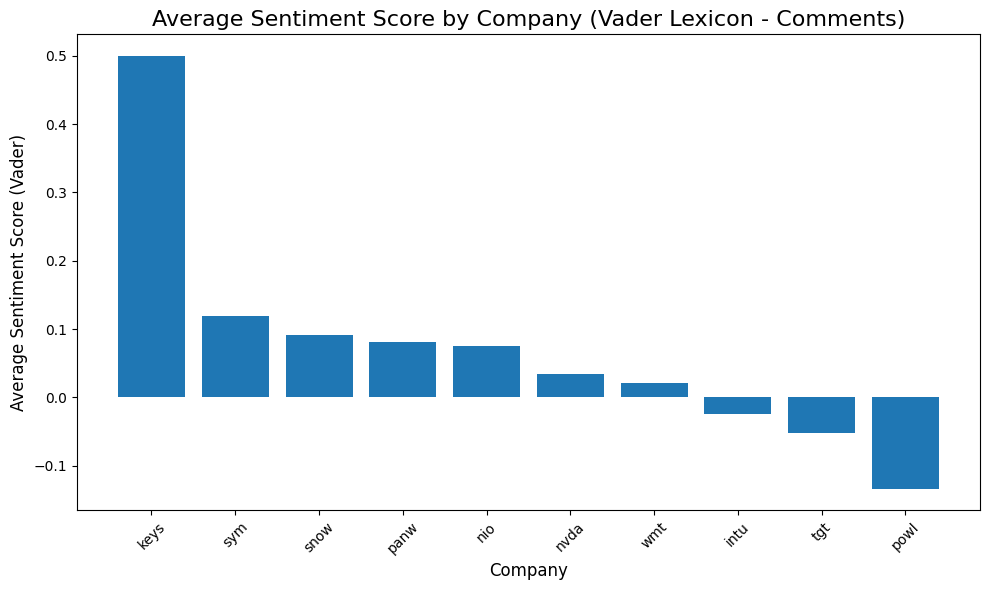

In [83]:
# Group data by company and calculate the average sentiment score for each company
from matplotlib import pyplot as plt
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

try:
    sid = SentimentIntensityAnalyzer()
except:
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()

data = pd.read_csv('data/combined_dataset.csv') 

# Apply Vader sentiment analysis to the 'comment' column in the original dataset
data['Sentiment'] = data['comment'].apply(lambda comment: sid.polarity_scores(comment)['compound'])

# Group by company and calculate the average Vader sentiment score
company_sentiment_vader_comments = data.groupby('company')['Sentiment'].mean().reset_index()

# Sort by sentiment score for visualization
company_sentiment_vader_comments = company_sentiment_vader_comments.sort_values(by='Sentiment', ascending=False)

# Plot sentiment by company as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(company_sentiment_vader_comments['company'], company_sentiment_vader_comments['Sentiment'])
plt.title('Average Sentiment Score by Company (Vader Lexicon - Comments)', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Sentiment Score (Vader)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



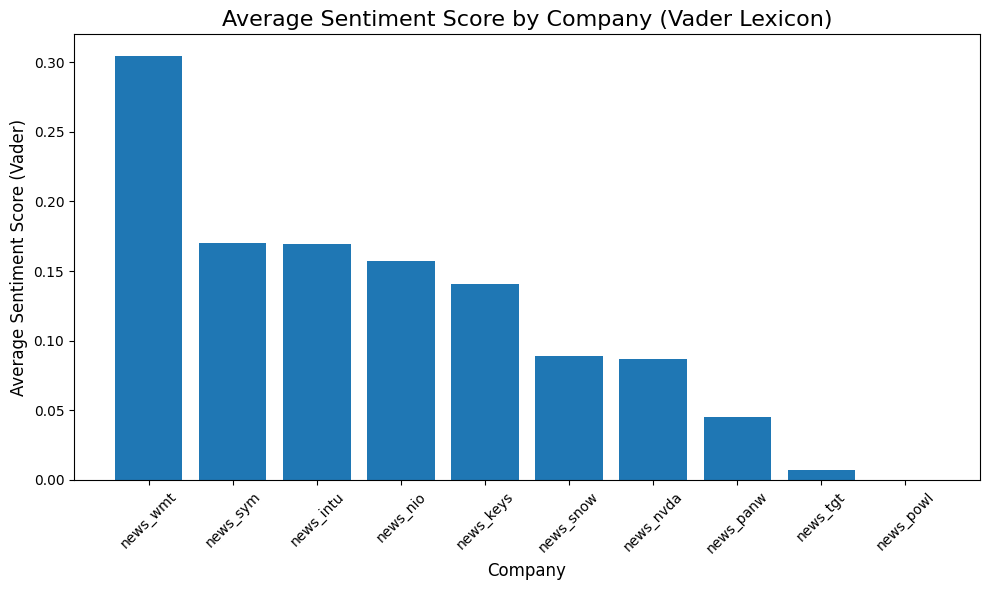

In [84]:
news_data = pd.read_csv("data/combine.csv")

# Apply sentiment analysis to the 'Title' column
news_data['Sentiment'] = news_data['Title'].apply(lambda title: sid.polarity_scores(title)['compound'])

# Group by company to calculate average sentiment scores
company_sentiment_vader = news_data.groupby('Company')['Sentiment'].mean().reset_index()

# Sort for better visualization
company_sentiment_vader = company_sentiment_vader.sort_values(by='Sentiment', ascending=False)

# Plot sentiment by company
plt.figure(figsize=(10, 6))
plt.bar(company_sentiment_vader['Company'], company_sentiment_vader['Sentiment'])
plt.title('Average Sentiment Score by Company (Vader Lexicon)', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Sentiment Score (Vader)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


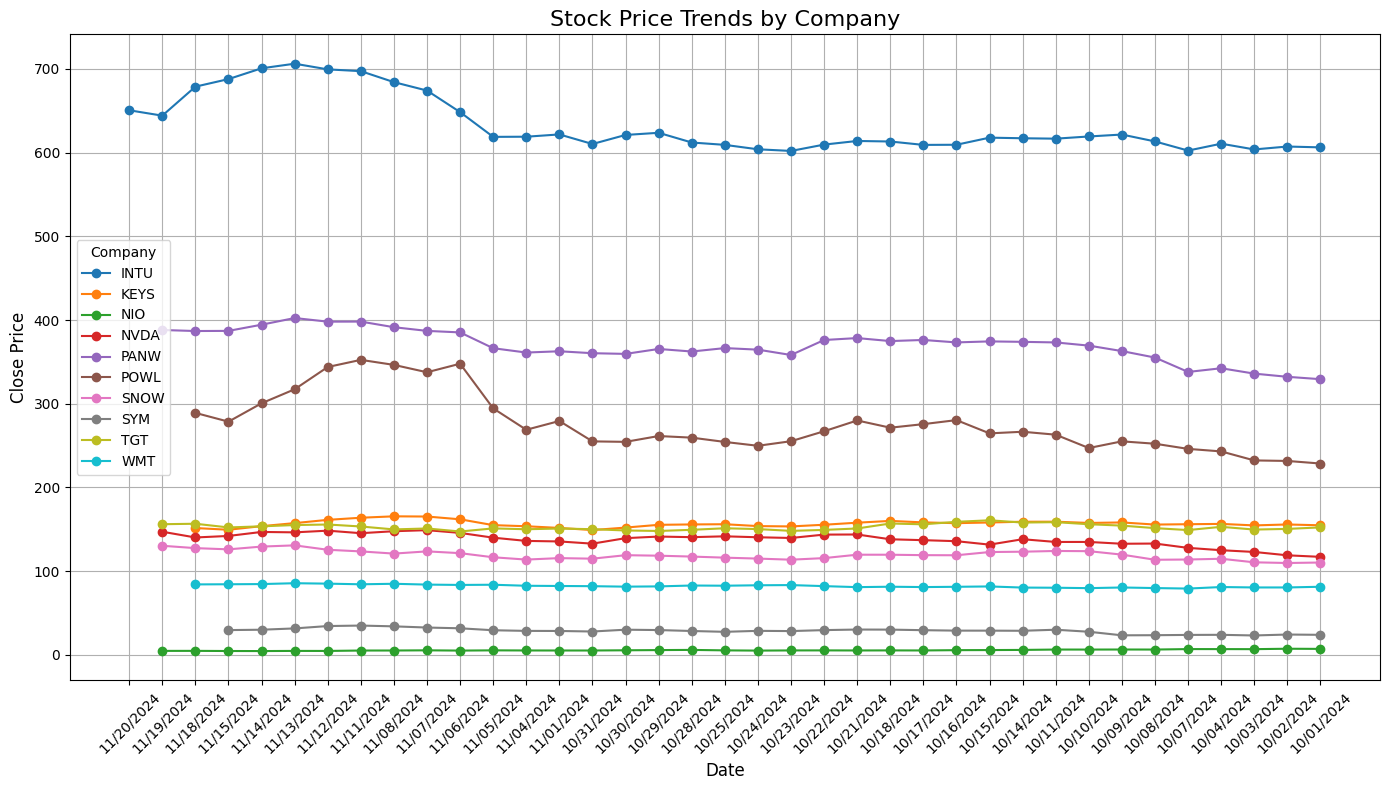

In [85]:
price_data = pd.read_csv("data/combined_prices.csv")

# Plot price trends with each company in a different color
plt.figure(figsize=(14, 8))

# Iterate through each company and plot its data
for company in price_data['Company'].unique():
    company_data = price_data[price_data['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], marker='o', label=company.upper())

# Add title and labels
plt.title('Stock Price Trends by Company', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(title="Company")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


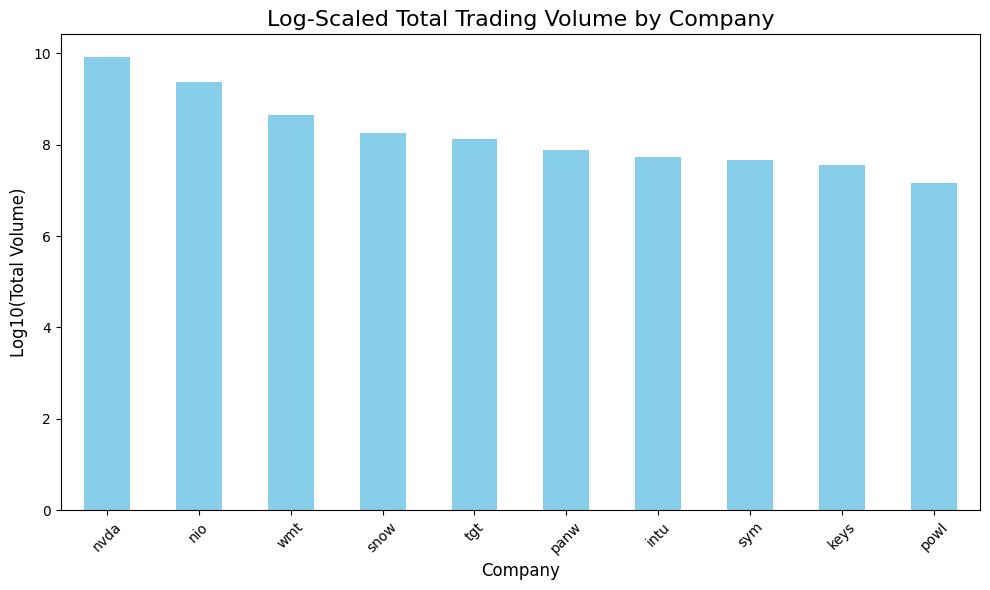

In [89]:
import numpy as np

# Reload the dataset with the correct volume column
price_data_path = './data/combined_prices.csv'
price_data = pd.read_csv(price_data_path)

# Remove commas from the "Volume" column and convert to numeric
price_data['Volume'] = price_data['Volume'].str.replace(',', '').astype(float)

# Recalculate total volume by company
volume_by_company = price_data.groupby('Company')['Volume'].sum().sort_values(ascending=False)

# Apply log scaling to the total volumes for better comparison
volume_by_company_log = np.log10(volume_by_company)

# Plot the log-scaled total volume by company
plt.figure(figsize=(10, 6))
volume_by_company_log.plot(kind='bar', color='skyblue')
plt.title('Log-Scaled Total Trading Volume by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Log10(Total Volume)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Plot volume over time for each company with log scaling and unique colors
plt.figure(figsize=(14, 8))

for company in price_data['Company'].unique():
    company_data = price_data[price_data['Company'] == company]
    plt.plot(
        company_data['Date'],
        np.log10(company_data['Volume']),
        label=company
    )

plt.title('Log-Scaled Volume Over Time by Company', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log10(Volume)', fontsize=12)
plt.legend(title='Company')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
